In [42]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector as sql
from sqlalchemy import create_engine
c= sql.connect(host = 'localhost',
               database = 'live_case',
               user='root',
               password = 'Safo3825#',
              auth_plugin='mysql_native_password')

In [43]:
media_df_1 = pd.read_excel('Second_Harvest_Heartland__News_and_Broadcast_May2021_April2022.xlsx', )

In [44]:
media_df_2 = pd.read_excel('Second_Harvest_Heartland__News_and_Broadcast_May 2020_April 2021.xlsx', )

In [45]:
media_df_1.rename(columns = {' AVE ':'AVE'}, inplace = True)

In [46]:
media_df_2.shape

(1590, 20)

In [47]:
media_df_2['AVE']

0       147988.41
1         3944.66
2          294.46
3         3944.66
4         1662.16
          ...    
1585      1188.63
1586       365.44
1587       115.87
1588        57.94
1589       144.94
Name: AVE, Length: 1590, dtype: float64

In [48]:
media_df = pd.concat([media_df_1,media_df_2])

In [49]:
media_df.shape

(2850, 20)

In [50]:
media_df.head()

,Date,Headline,URL,Hit Sentence,Source,Influencer,Country,Reach,Desktop Reach,Mobile Reach,Twitter Social Echo,Facebook Social Echo,Reddit Social Echo,AVE,Sentiment,Key Phrases,Input Name,Time,State,City
0,29-Apr-2022 03:28PM,How did Gov. Tim Walz use a chunk of the pande...,https://www.minnpost.com/race-health-equity/20...,$3 million\n\nto combat food insecurity. Funds...,MinnPost,Ava Kian,United States,432262,139977,292285,5,22,0,3998.42,Neutral,"American Rescue Plan funding,CARES funds,CDC s...",Second Harvest Heartland | News,15:28:00,Minnesota,Minneapolis
1,27-Apr-2022 09:13PM,Child poverty vs. plutocratic plenty,https://duluthreader.com/articles/2022/04/27/1...,women.”\n\nMessage to the Minnesota Republican...,Duluth Reader,Ed Raymond's work,United States,8306,2960,5346,1,0,0,76.83,Neutral,"14th century,20th century women,American women...",Second Harvest Heartland | News,21:13:00,Minnesota,Duluth
2,27-Apr-2022 09:16AM,Second Harvest Heartland volunteers making a d...,https://www.kare11.com/article/news/local/kare...,", explained\n\nSecond Harvest Heartland\n\n's ...",KARE-TV,Shelley Stridsberg,United States,1178357,381530,796827,1,0,0,10899.8,Neutral,"KARE 11 partner,Second Harvest Heartland,backb...",Second Harvest Heartland | News,09:16:00,Minnesota,Golden Valley
3,27-Apr-2022 06:58AM,Second Harvest Heartland raises money for hung...,https://www.kare11.com/video/news/local/kare11...,Second Harvest Heartland raises money for hung...,KARE-TV,NaN,United States,1178357,381530,796827,0,0,0,10899.8,Negative,"Second Harvest Heartland,hungry Minnesotans,money",Second Harvest Heartland | News,06:58:00,Minnesota,Golden Valley
4,26-Apr-2022 11:00PM,Franklin & Marshall: Grads to Gather at May 14...,proquest:publicid-2655546418,launch of the Milwaukee Bucks Foundation. O'To...,Targeted News Service (Print Edition),NaN,United States,1167,450,717,0,0,0,10.79,Neutral,"93.A professor,Faculty and College leadership,...",Second Harvest Heartland | News,23:00:00,Virginia,Springfield


In [51]:
media_df['Country'].unique()

array(['United States', 'Canada', 'India', 'United Kingdom', 'Romania',
       'Australia', 'Switzerland', 'Norway', 'New Zealand',
       'South Africa', 'Liberia', 'Netherlands', 'Mexico',
       'United Arab Emirates', 'Italy', 'Singapore'], dtype=object)

In [55]:
donation_df = pd.read_excel("Gift Data File - SHH.xlsx")

In [60]:
## delete recurring gift since it is not relevant in problem context

donation_df=donation_df.loc[donation_df['Gift Type']!='Recurring Gift']

In [62]:
donation_df['Lifetime # of Gifts'].describe()

count    238371.000000
mean         37.938784
std         221.495158
min           1.000000
25%           3.000000
50%          10.000000
75%          25.000000
max        8033.000000
Name: Lifetime # of Gifts, dtype: float64

In [63]:
g= donation_df.groupby("Donor ID").agg({'Date':'nunique','Amount':'sum'}).sort_values('Date',ascending=False)
g['pct'] = g['Amount']*100/ g['Amount'].sum()
g[g['Date'] >= 12]['pct'].sum()
g

,Date,Amount,pct
Donor ID,,,
457989,281,1371438.47,1.635280
125656,150,249896.34,0.297972
210994,138,189045.00,0.225414
393030,131,550810.47,0.656777
333964,105,6150.00,0.007333
...,...,...,...
329072,1,50.00,0.000060
329087,1,1000.00,0.001192
329088,1,431.50,0.000515


In [64]:
donation_df.groupby("Donor ID").count()['Date'].sort_values(ascending=False)

Donor ID
457989    940
393030    512
125656    382
163883    300
109771    204
         ... 
329631      1
329659      1
329673      1
329681      1
486787      1
Name: Date, Length: 97193, dtype: int64

In [65]:
donor_count = donation_df.groupby("Donor ID").count()['Date'].sort_values(ascending=False)

In [66]:
donation_df=donation_df[(donation_df['Gf_Apls_1_01_ApAtrCat_2_01_Description']!="Corporate")&
            (donation_df['Gf_Apls_1_01_ApAtrCat_2_01_Description']!="Community Engagement")&
            (donation_df['Gf_Apls_1_01_ApAtrCat_2_01_Description']!= "Special Events")]

In [67]:
donation_df

,Date,Amount,Gift ID,Payment Method,Gift Type,Fund,Donor ID,Key Indicator,Donor Zip Code,Gf_Apls_1_01_ApAtrCat_2_01_Description,Lifetime # of Gifts,First Gift Date,First Gift Amt,Last Gift Date,Last Gift Amt
2,2021-05-25,0.01,rev-11684615,Other,Cash,Unrestricted,125656,I,31907-1355,Direct Marketing,959,2020-10-05,10.00,2021-09-30,32.0
6,2021-04-28,0.50,rev-11671678,Cash,Cash,Unrestricted,125656,I,31907-1355,Direct Marketing,959,2020-10-05,10.00,2021-09-30,32.0
7,2020-09-10,1.00,rev-11511171,Cash,Cash,Unrestricted,445445,I,55414-1210,Direct Marketing,5,2020-09-10,1.00,2021-09-15,1.0
8,2020-09-30,1.00,rev-11522557,Cash,Cash,Unrestricted,332636,I,NaN,Direct Marketing,1,2020-09-30,1.00,2020-09-30,1.0
9,2020-09-30,1.00,rev-11522553,Cash,Cash,Unrestricted,447224,I,55401-1938,Direct Marketing,1,2020-09-30,1.00,2020-09-30,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244352,2022-04-30,30.00,97336953,Credit Card,Cash,Unrestricted,30464,I,55423-1348,Direct Marketing,29,2007-12-07,22.00,2022-02-10,50.0
244353,2022-04-30,50.00,97336954,Credit Card,Cash,Unrestricted,84739,I,55082-5591,Direct Marketing,194,1996-11-13,20.00,2022-02-02,200.0
244354,2022-04-22,117.00,97336955,Other,Cash,Unrestricted,457989,O,29492-7541,Individual & Corporate Major,944,2020-11-20,100.00,2022-05-03,1069.8
244355,2022-04-22,117.00,97336956,Other,Cash,Unrestricted,457989,O,29492-7541,Individual & Corporate Major,944,2020-11-20,100.00,2022-05-03,1069.8


In [68]:
donation_df=donation_df[donation_df['Donor Zip Code'].str.len()==10]

2355 people donated more than 10 times in the past two years, for business logic, 
we only consider people who donated less than 10 times

In [69]:
donation_df=donation_df[donation_df['Donor ID'].isin(g[g['Date']<12].index)]
donation_df.shape

(187161, 15)

In [70]:
donation_df_sum=donation_df.groupby('Date').sum()

<AxesSubplot:xlabel='Date', ylabel='Donation in Thousands(K)'>

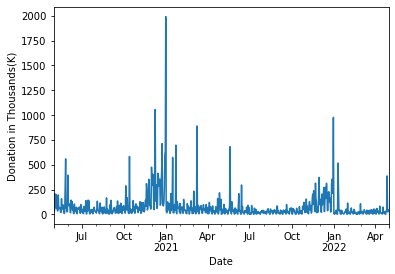

In [71]:
donation_df_sum['Amount in Thousands'] = donation_df_sum['Amount']/1000
donation_df_sum.plot(y='Amount in Thousands', ylabel = "Donation in Thousands(K)",legend = False)

In [72]:
donation_df_sum['Amount in Thousands'].describe()

count     730.000000
mean       73.400312
std       133.773786
min         0.380000
25%        14.583963
50%        36.642395
75%        75.518990
max      1992.007250
Name: Amount in Thousands, dtype: float64

In [73]:
donation_df_sum=donation_df_sum.reset_index()[['Date','Amount']]
donation_df_sum

,Date,Amount
0,2020-05-01,83900.57
1,2020-05-02,27081.00
2,2020-05-03,41760.00
3,2020-05-04,205792.89
4,2020-05-05,130154.25
...,...,...
725,2022-04-26,41036.03
726,2022-04-27,387114.38
727,2022-04-28,26805.00
728,2022-04-29,24039.08


In [75]:
def media_duration(x):
    if x =='SHH Broadcast Quality':
        return 7
    else:
        return 7

media_df['Media Duration']= media_df['Input Name'].apply(media_duration)

In [76]:
media_df['Date']= pd.to_datetime(media_df['Date']).dt.date

In [77]:
media_df['Media End'] = media_df['Date'] + pd.to_timedelta(media_df['Media Duration'], unit='D')

In [79]:
# one time to sql, comment out 
engine = create_engine("mysql+mysqlconnector://{user}:{pw}@{host}/{db}".format(host='localhost', 
                                                                           db='live_case', 
                                                                         user='root',
                                                                         pw='Safo3825#'),connect_args={'auth_plugin': 'mysql_native_password'})
media_df.to_sql('media',engine,if_exists='replace',index=False)

2771

In [84]:
#Exponential function decision

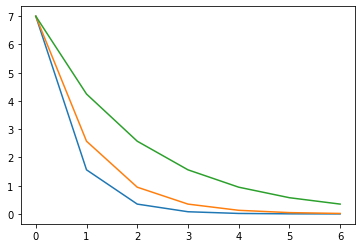

In [124]:
import math as m
import matplotlib.pyplot as plt
impact = 7
exps1 = [impact]
exps2 = [impact]
exps3 = [impact]
x = 1
while(x < impact):
    #exps.append(exps[len(exps)-1] - m.exp(1/x))
    exps1.append(impact* m.exp(-1.5*x))
    exps2.append(impact* m.exp(-1*x))
    exps3.append(impact* m.exp(-0.5*x))
    x = x+1
exps

plt.plot(exps1)
plt.plot(exps2)
plt.plot(exps3)

plt.show()
